In [19]:
import wordcloud
import numpy as np
import io
import requests
import PIL
import matplotlib.pyplot as plt
from urllib import request

In [16]:
url = "https://www.gutenberg.org/files/17989/17989-0.txt"

In [22]:
response = request.urlopen(url)
raw = response.read().decode('utf8')

In [23]:
dumas = raw.split("*** START OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***")[1].split("*** END OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***")[0]

In [24]:
import re

In [26]:
def clean_text(text):
  text= text.lower()
  text = ' '.join(text.split())
  return text


In [27]:
dumas = clean_text(dumas)

In [29]:
dumas[10000:10500]

" mes yeux. --vous avez donc vu l'empereur aussi? --il est entré chez le maréchal pendant que j'y étais. --et vous lui avez parlé? --c'est-à-dire que c'est lui qui m'a parlé, monsieur, dit dantès en souriant. --et que vous a-t-il dit? --il m'a fait des questions sur le bâtiment, sur l'époque de son départ pour marseille, sur la route qu'il avait suivie et sur la cargaison qu'il portait. je crois que s'il eût été vide, et que j'en eusse été le maître, son intention eût été de l'acheter; mais je lu"

In [7]:
img = "https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/book.png"

In [12]:
book_mask = np.array(PIL.Image.open(io.BytesIO(requests.get(img).content)))

In [54]:
def make_wordcloud(corpus):
      wc = wordcloud.WordCloud(background_color='white', max_words=2000, mask=book_mask, contour_width=3, contour_color='black')
      wc.generate(corpus)
      return wc


In [55]:
wordcloud_dumas = make_wordcloud(dumas)

(-0.5, 1429.5, 783.5, -0.5)

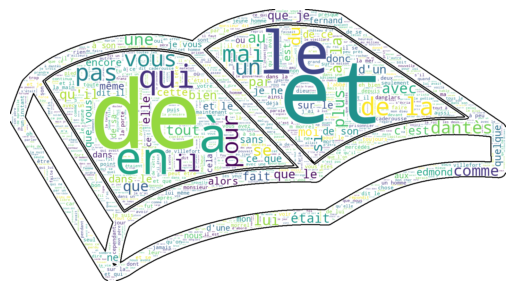

In [56]:
plt.imshow(wordcloud_dumas, interpolation="bilinear")
plt.axis('off')

In [58]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [60]:
words = nltk.word_tokenize(dumas, language='french')

In [61]:
words[1030:1050]

['que',
 'voulez-vous',
 ',',
 'monsieur',
 'edmond',
 ',',
 'reprit',
 "l'armateur",
 'qui',
 'paraissait',
 'se',
 'consoler',
 'de',
 'plus',
 'en',
 'plus',
 ',',
 'nous',
 'sommes',
 'tous']

In [65]:
words= [word for word in words if word.isalpha()]

In [66]:
words[1030:1050]

['assez',
 'sombre',
 'obséquieux',
 'envers',
 'ses',
 'supérieurs',
 'insolent',
 'envers',
 'ses',
 'subordonnés',
 'aussi',
 'outre',
 'son',
 'titre',
 'comptable',
 'qui',
 'est',
 'toujours',
 'un',
 'motif']

In [76]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
from nltk.corpus import stopwords
print(stopwords.words("french"))

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [79]:
stop_words = set(stopwords.words("french"))

In [80]:
word = [w for w in words if not w in stop_words]

In [81]:
print(words[1030:1050])

['assez', 'sombre', 'obséquieux', 'envers', 'ses', 'supérieurs', 'insolent', 'envers', 'ses', 'subordonnés', 'aussi', 'outre', 'son', 'titre', 'comptable', 'qui', 'est', 'toujours', 'un', 'motif']


In [89]:
wc = make_wordcloud(' '.join(words))

(-0.5, 1429.5, 783.5, -0.5)

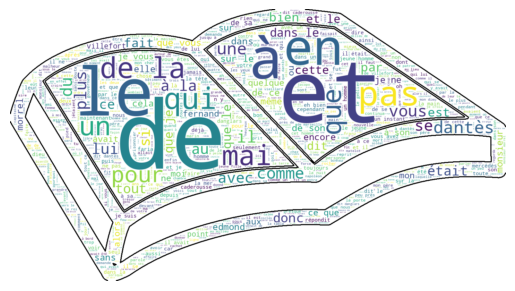

In [92]:
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [93]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="french")

In [94]:
stemmed = [stemmer.stem(word) for word in words]

In [95]:
print(stemmed[1030:1050])

['assez', 'sombr', 'obséqui', 'enver', 'se', 'supérieur', 'insolent', 'enver', 'se', 'subordon', 'auss', 'outr', 'son', 'titr', 'comptabl', 'qui', 'est', 'toujour', 'un', 'motif']


In [96]:
! pip install deplacy

In [97]:
! python -m spacy download fr_core_news_sm

2023-12-22 10:15:40.433087: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 10:15:40.433203: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 10:15:40.441734: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-22 10:15:40.473205: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-22 10:15:42.020177: W tensorflow/compiler/tf2

In [98]:
import spacy
from spacy import displacy

In [103]:
nlp = spacy.load("fr_core_news_sm")

In [104]:
doc = nlp(dumas[15000:17000])

In [105]:
displacy.render(doc,style="ent", jupyter=True)